In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,NaN,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,NaN,183.0,64.0,NaN,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,NaN,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	95
float64		column 2	114
float64		column 3	57
float64		column 4	76
float64		column 5	57
float64		column 6	76
float64		column 7	38
float64		column 8	95


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,673.000000,654.000000,711.000000,692.000000,711.000000,692.000000,730.000000,673.000000
mean,3.763744,120.068807,69.486639,20.627168,76.507736,32.016474,0.469229,32.931649
std,3.268135,30.666159,18.348183,15.721150,107.711088,7.495536,0.328783,11.508980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,29.000000
75%,6.000000,137.000000,80.000000,32.000000,123.500000,36.125000,0.613750,40.000000
max,17.000000,199.000000,114.000000,99.000000,680.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

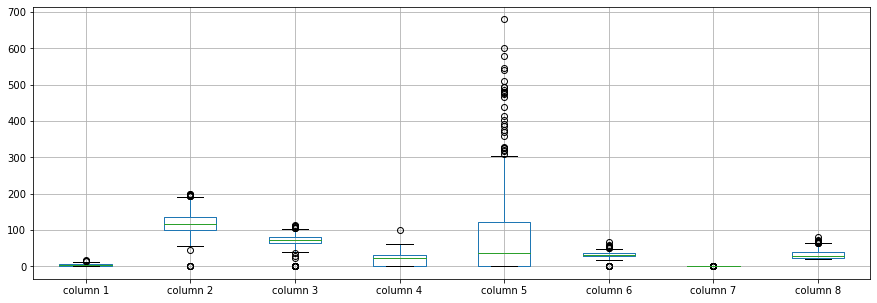

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.763744
column 2    120.068807
column 3     69.486639
column 4     20.627168
column 5     76.507736
column 6     32.016474
column 7      0.469229
column 8     32.931649
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.139583,0.159044,-0.047287,-0.057021,0.093273,-0.059373,0.522700
column 2,0.139583,1.000000,0.148292,0.110177,0.302041,0.197913,0.143667,0.265327
column 3,0.159044,0.148292,1.000000,0.188189,0.084085,0.235241,0.038382,0.238555
column 4,-0.047287,0.110177,0.188189,1.000000,0.442483,0.394377,0.179535,-0.105204
column 5,-0.057021,0.302041,0.084085,0.442483,1.000000,0.201438,0.169995,-0.081046
column 6,0.093273,0.197913,0.235241,0.394377,0.201438,1.000000,0.174068,0.088067
column 7,-0.059373,0.143667,0.038382,0.179535,0.169995,0.174068,1.000000,0.038262
column 8,0.522700,0.265327,0.238555,-0.105204,-0.081046,0.088067,0.038262,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+10,8+10+10,8+10+10+10,8+10+10+10+10,8+10+10+10+10+10,8+10+10+10+10+10+10,8+10+10+10+10+10,8+10+10+10+10,8+10+10+10,8+10+10,8+10,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 377.493195215861
Epoch: 1 , loss: 377.66820589701337
Epoch: 2 , loss: 375.26799329121906
Epoch: 3 , loss: 375.2512613932292
Epoch: 4 , loss: 374.3782494862874
Epoch: 5 , loss: 374.40783500671387
Epoch: 6 , loss: 373.55284055074054
Epoch: 7 , loss: 372.60947863260907
Epoch: 8 , loss: 374.1184546152751
Epoch: 9 , loss: 370.6239782969157
Epoch: 10 , loss: 370.6642716725667
Epoch: 11 , loss: 367.841947555542
Epoch: 12 , loss: 368.29723866780597
Epoch: 13 , loss: 365.72157224019367
Epoch: 14 , loss: 359.9314905802409
Epoch: 15 , loss: 352.64317893981934
Epoch: 16 , loss: 345.66854921976727
Epoch: 17 , loss: 341.459046681722
Epoch: 18 , loss: 337.6683152516683
Epoch: 19 , loss: 336.1924648284912
Epoch: 20 , loss: 327.4446512858073
Epoch: 21 , loss: 326.85547002156574
Epoch: 22 , loss: 322.5143566131592
Epoch: 23 , loss: 319.12385114034015
Epoch: 24 , loss: 312.05053838094074
Epoch: 25 , loss: 321.488229433695

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    84.000000
column 4     0.281507
column 5     0.000000
column 6    35.400000
column 7     0.388000
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.0,-34.857434,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,-7.773257,0.000000,0.0,0.222914,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
764,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,-26.769328
765,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
766,0.000000,0.000000,0.0,0.377889,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2277.5142001681934, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.39426714061389906

In [18]:
new_df.iloc[66,:]

column 1      0.232912
column 2    109.000000
column 3      0.229431
column 4     30.000000
column 5      0.000000
column 6     32.500000
column 7      0.855000
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.000000,72.0,0.142566,0.0,33.6,0.627,50.000000
1,1.000000,85.000000,66.0,29.000000,0.0,26.6,0.351,31.000000
2,0.226743,183.000000,64.0,0.222914,0.0,23.3,0.672,32.000000
3,1.000000,89.000000,66.0,23.000000,94.0,28.1,0.167,21.000000
4,0.000000,137.000000,40.0,35.000000,168.0,43.1,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.0,48.000000,180.0,32.9,0.171,63.000000
764,2.000000,122.000000,70.0,27.000000,0.0,36.8,0.340,0.230672
765,5.000000,121.000000,72.0,23.000000,112.0,26.2,0.245,30.000000
766,1.000000,126.000000,60.0,0.377889,0.0,30.1,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_NW_10.xlsx", index=False, header=False)